<a href="https://colab.research.google.com/github/DanielFabrikant/Riskified_home_assignment/blob/main/riskifield_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Analyst home assignment- Riskified**

**Daniel Fabrikant**

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/DanielFabrikant/Riskified_home_assignment/main/new_dataset.csv")
df.head()

,order_id,order_date,order_status,price,digital_product,customer_account_age,order_source,billing_zip,shipping_name_length,classification_score
0,945827823,2019-06-28,approved,16.44,False,759,web,98109,9,1.000000
1,932303597,2019-06-18,approved,150.00,True,894,web,52761,0,0.999999
2,916501223,2019-06-07,approved,105.94,False,5160,web,60047,10,0.999999
3,916516038,2019-06-07,approved,100.00,True,1267,web,46516,0,0.999999
4,925554558,2019-06-13,approved,225.00,True,889,web,52761,0,0.999999


**1. Rely exclusively on model scores and set a decline threshold that will provide a 90% approval rate.**



In [95]:
threshold = df['classification_score'].quantile(0.1, interpolation='higher')
print(threshold)

0.860857012


 classification scores > 0.86 will provide a 90%
approval rate 

**2. Plot the model scores distribution**

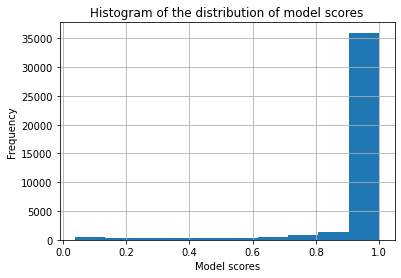

In [96]:
df = df.sort_values('classification_score')
df['classification_score'].hist()
plt.gca().set(title= 'Histogram of the distribution of model scores', ylabel='Frequency', xlabel= 'Model scores')
plt.show()


Model scores distribution around threshold '1',
this fits in with the logic because the dataset included only approvals and chargebacks.

**3. Assuming we aim at a proportion of 50% between the CHB cost and the total revenue (sum amount of CHBs divided by the total revenue), what would have to be the fee?**

In [97]:
TABLE_CHB = df.loc[df['order_status'] == 'chargeback']
CHB = sum(TABLE_CHB['price'])
TABLE_total_price = df.loc[df['order_status'] != 'decline']
total_price = sum(TABLE_total_price['price'])
fee = CHB / (0.5* total_price)
print(fee)

0.006015218197352008


Assuming that the revenue model is a fee * price for approved and chargeback orders,
The formula for calculating the required fee: sum(price(CHB))/ fee * sum(price(approved + chargeback)) = 0.5.
To get this ratio the fee has to be 0.006.



**4. In the dataset, there’s a column indicating whether the purchased goods are digital or tangible. What can you say about the risk level of each segment?**

In [78]:
pivot = df.pivot_table(index = ['digital_product', 'order_status'], 
                       values = 'order_id' , aggfunc ='count')
pivot['% of Total'] = (pivot['order_id']/pivot['order_id'].sum())*100
print (pivot)

                              order_id  % of Total
digital_product order_status                      
False           approved         13498   33.063074
                chargeback          40    0.097979
True            approved         26967   66.055113
                chargeback         320    0.783833



Digital products have higher chargback than tangible products, also the fraud rate on the Digital products is higher than the fraud rate on tangible products.

**5. Free exploration - Provide 2-3 interesting breakdowns or insights.**

**5-1:**

In [79]:
pivot_source = df.pivot_table(index = 'order_status', columns= 'order_source',
                              values = 'order_id' ,aggfunc = 'count')
pivot_source.loc['total', :] = pivot_source.sum().values      
print(pivot_source)
CHB_mobile_prec = (pivot_source.at['chargeback','mobile_app']/pivot_source.at['total','mobile_app'])*100
print("% CHB from mobile app is:", CBH_mobile_prec, "%")
CHB_web_prec = (pivot_source.at['chargeback','web']/pivot_source.at['total','web'])*100
print("% CHB from web is:", CHB_web_prec, "%")

order_source  mobile_app      web
order_status                     
approved           663.0  39802.0
chargeback          11.0    349.0
total              674.0  40151.0
% CHB from mobile app is: 1.6320474777448073 %
% CHB from web is: 0.8692186994097283 %


The amount of orders from the web is higher than the mobile app, but the fraud rate in the mobile app is higher than the fraud rate in the web.

**5-2:**

Text(0.5, 1.0, 'Orders per days')

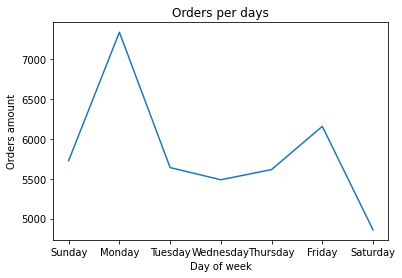

In [80]:
df['order_date'] = pd.to_datetime(df['order_date'])
order_day = df['order_date'].dt.day_name()
cats = [ 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
order_day_group = order_day.groupby(order_day).count().reindex(cats)
plt.plot(order_day_group)
plt.xlabel('Day of week')
plt.ylabel('Orders amount')
plt.title("Orders per days")

The number of orders on Mondays is high and on Saturdays it is low compared to the rest of the week.#In order to raise the revenue model it is worth thinking about different purchase fees for the days of the week.